# Seaborn
## statistical data visualization

**4. Grids Plots:** pairGrid, pairplot, facetGrid, JointGrid.

**5. Regression Plots:** lmplot, residplot. 

**6. Pie Chart & Bar Chart**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme()

# 4. Grids Plots

# Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


About Iris dataset:

The iris dataset contains the following data 50 samples of 3 different species of iris (150 samples total).
Measurements: sepal length, sepal width, petal length, petal width
The format for the data: (sepal length, sepal width, petal length, petal width).

<img src="03_iris.png" alt="Alternative text" />


## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

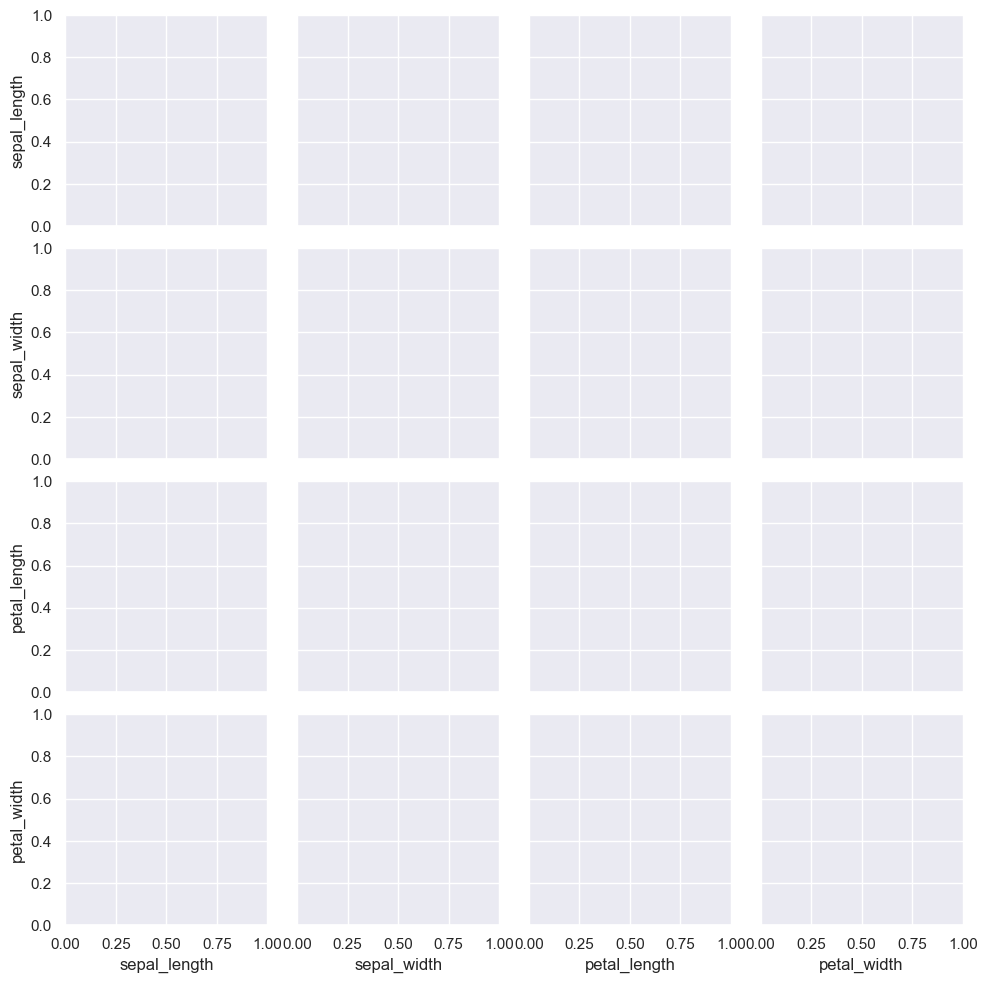

In [5]:
# Just the Grid
sns.PairGrid(iris)

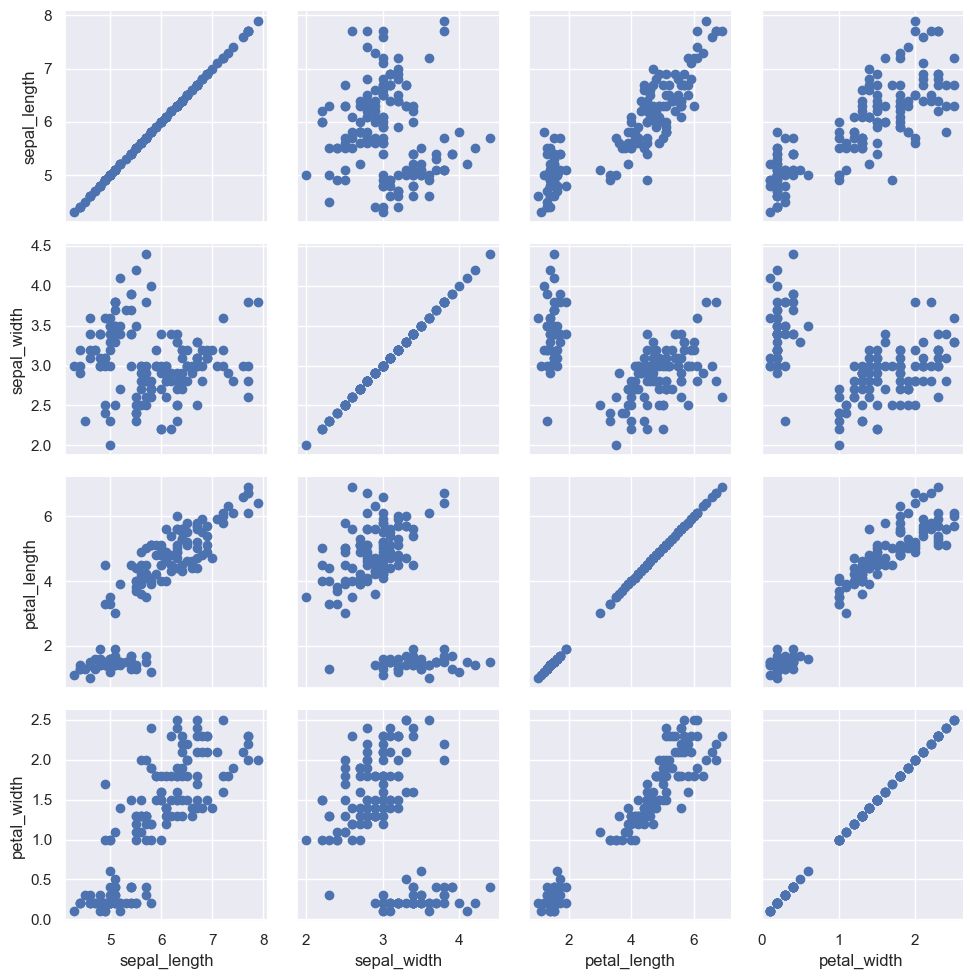

In [6]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

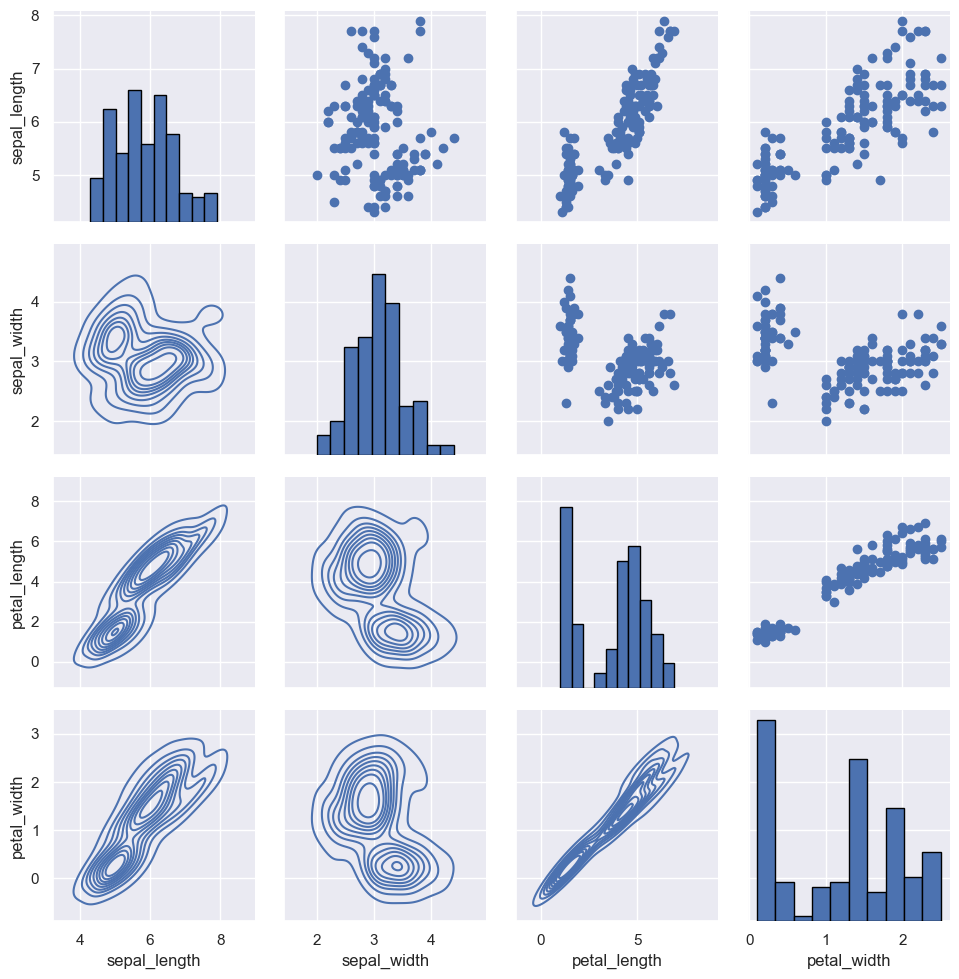

In [6]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist,ec='black')
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)


## Pairplot

Pairplot is a simpler version of PairGrid (you'll use quite often)

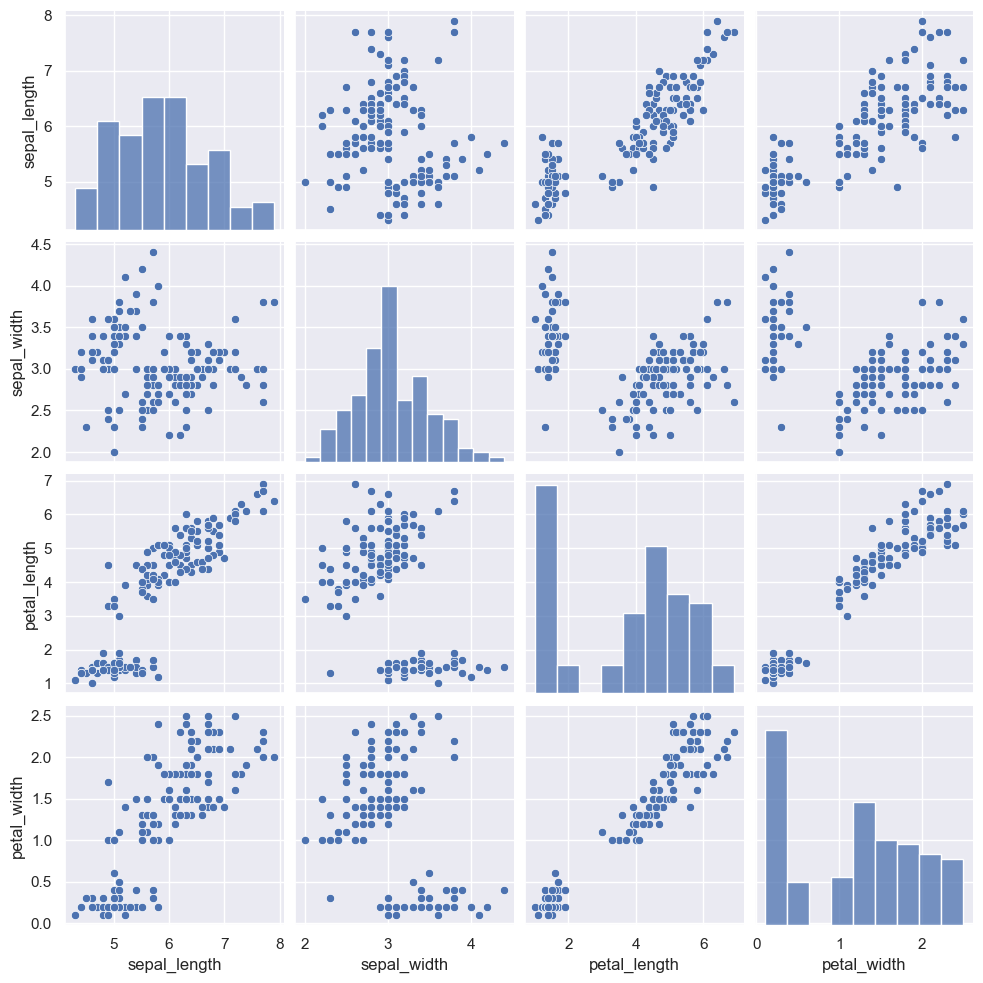

In [7]:
sns.pairplot(iris)


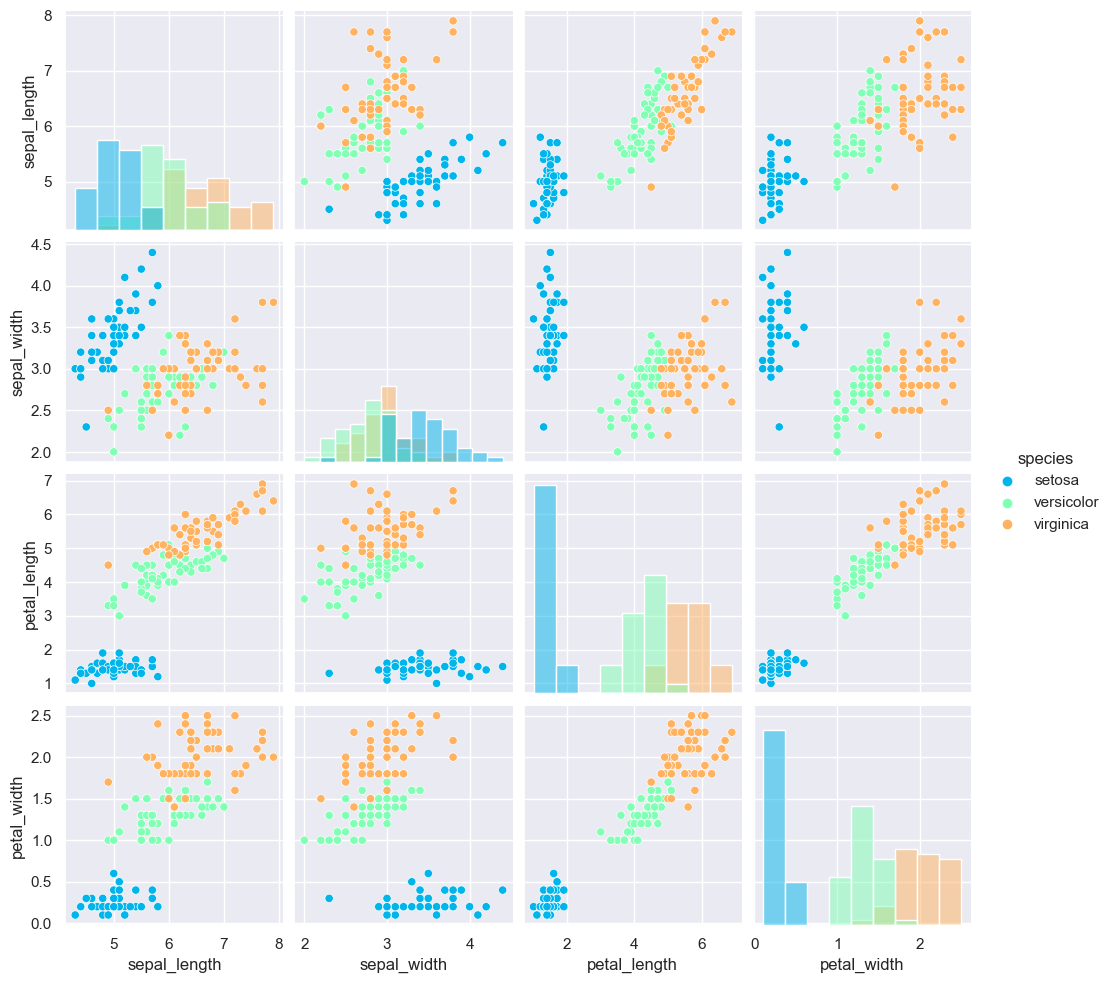

In [8]:
sns.pairplot(iris,hue='species',palette='rainbow',diag_kind="hist")


## Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

In [9]:
tips = sns.load_dataset('tips')

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


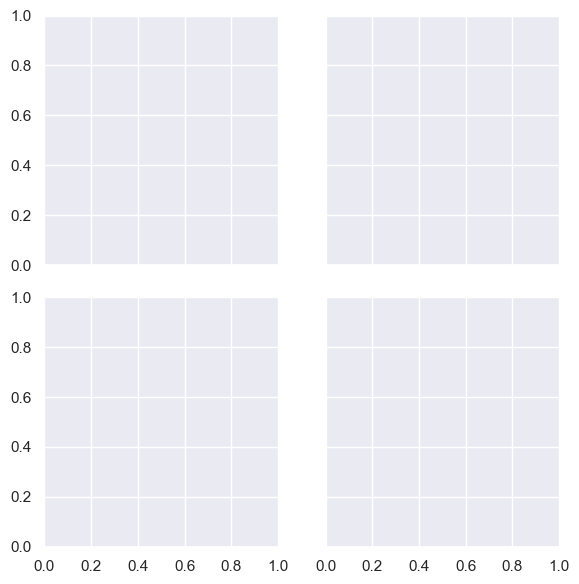

In [11]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

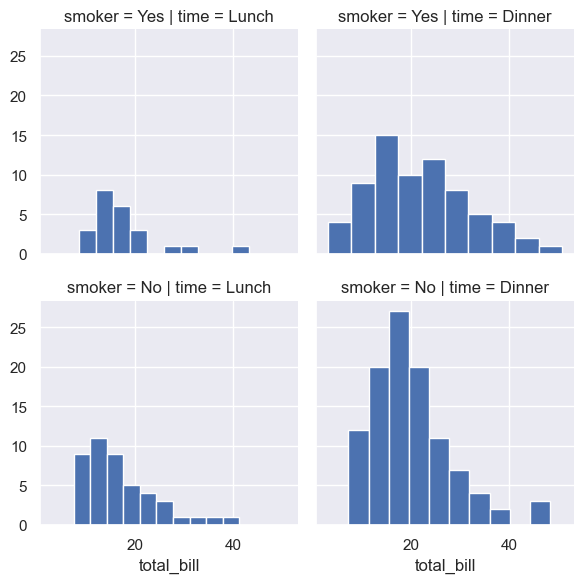

In [12]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

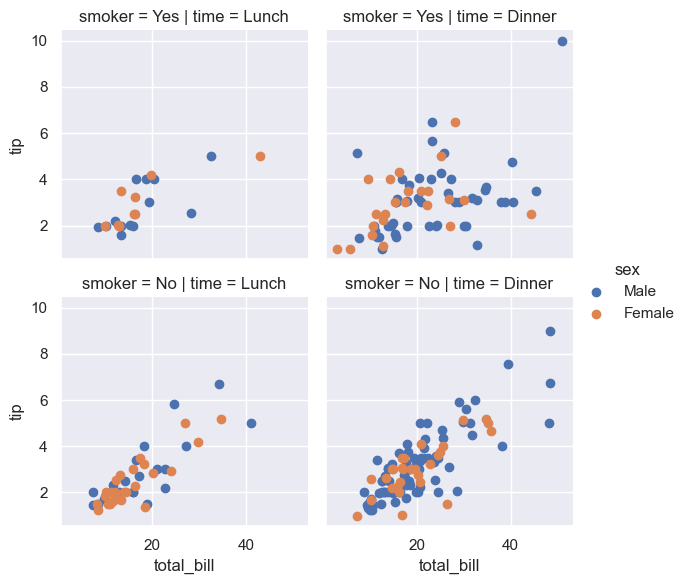

In [13]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()


## JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example:

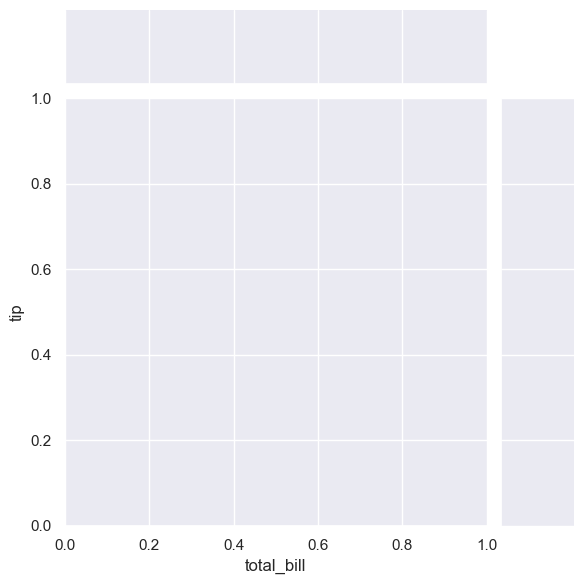

In [14]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

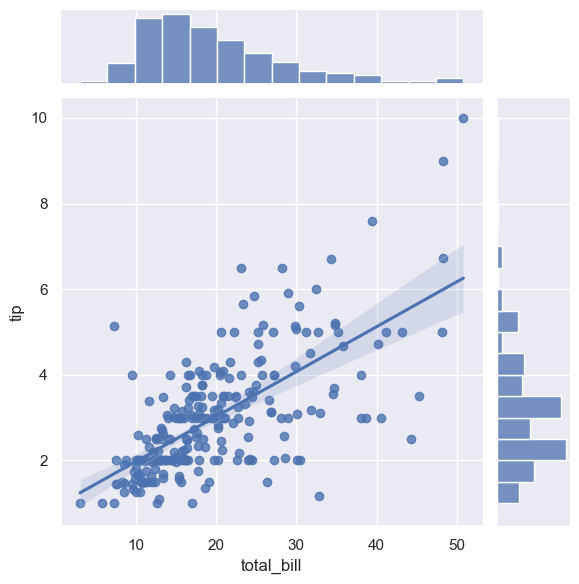

In [15]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.histplot)

# 5. Regression Plots:

Seaborn has many built-in capabilities for regression plots, however we  will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

## lmplot()

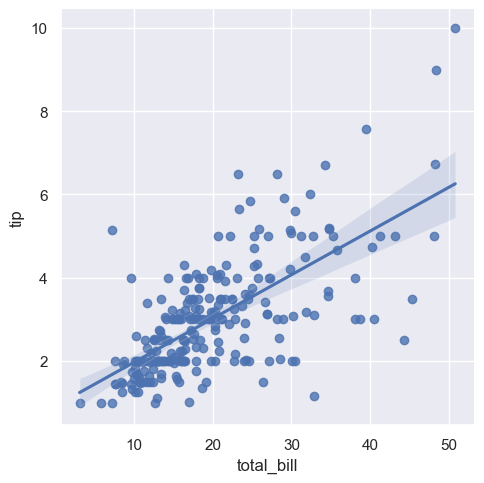

In [17]:
sns.lmplot(x='total_bill',y='tip',data=tips)

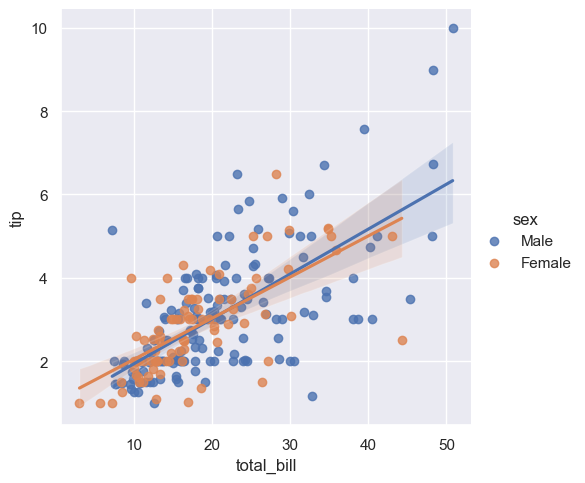

In [16]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

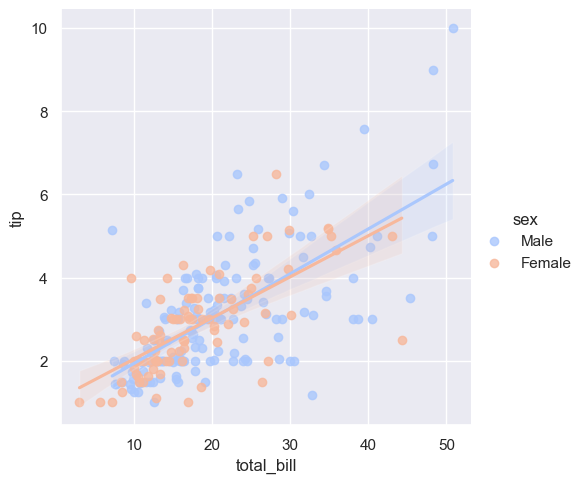

In [18]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

### Working with Markers

lmplot kwargs (kwargs means keyword arguments) get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So if you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

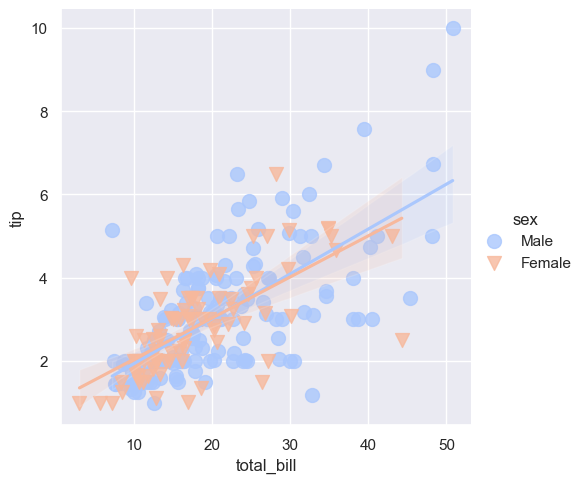

In [23]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100})



## Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

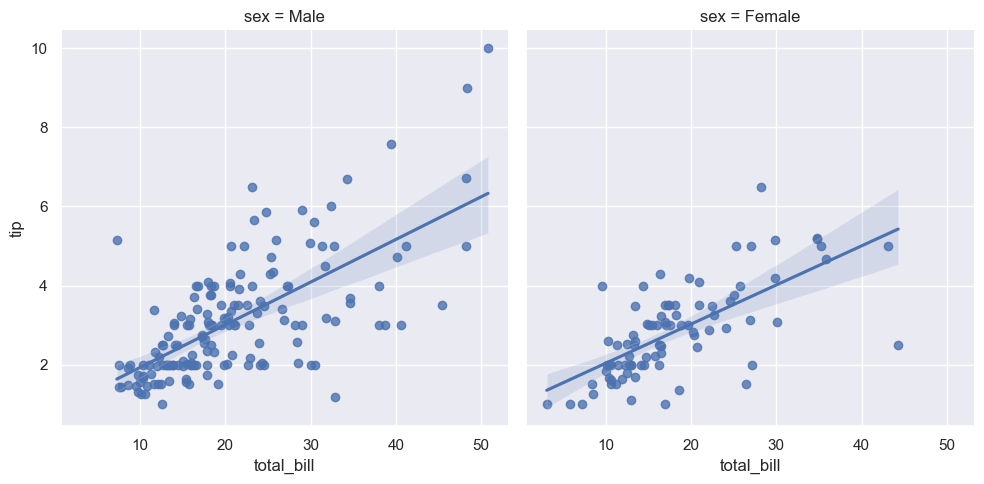

In [24]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

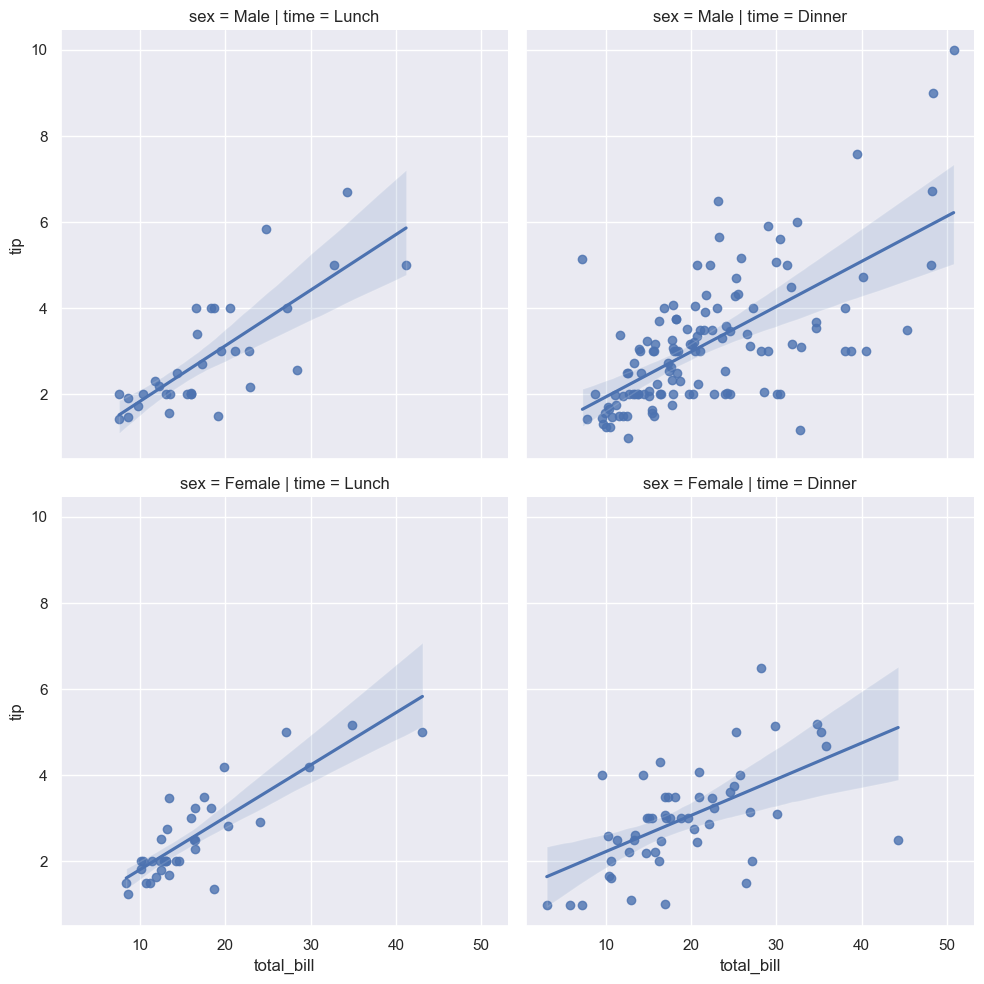

In [25]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

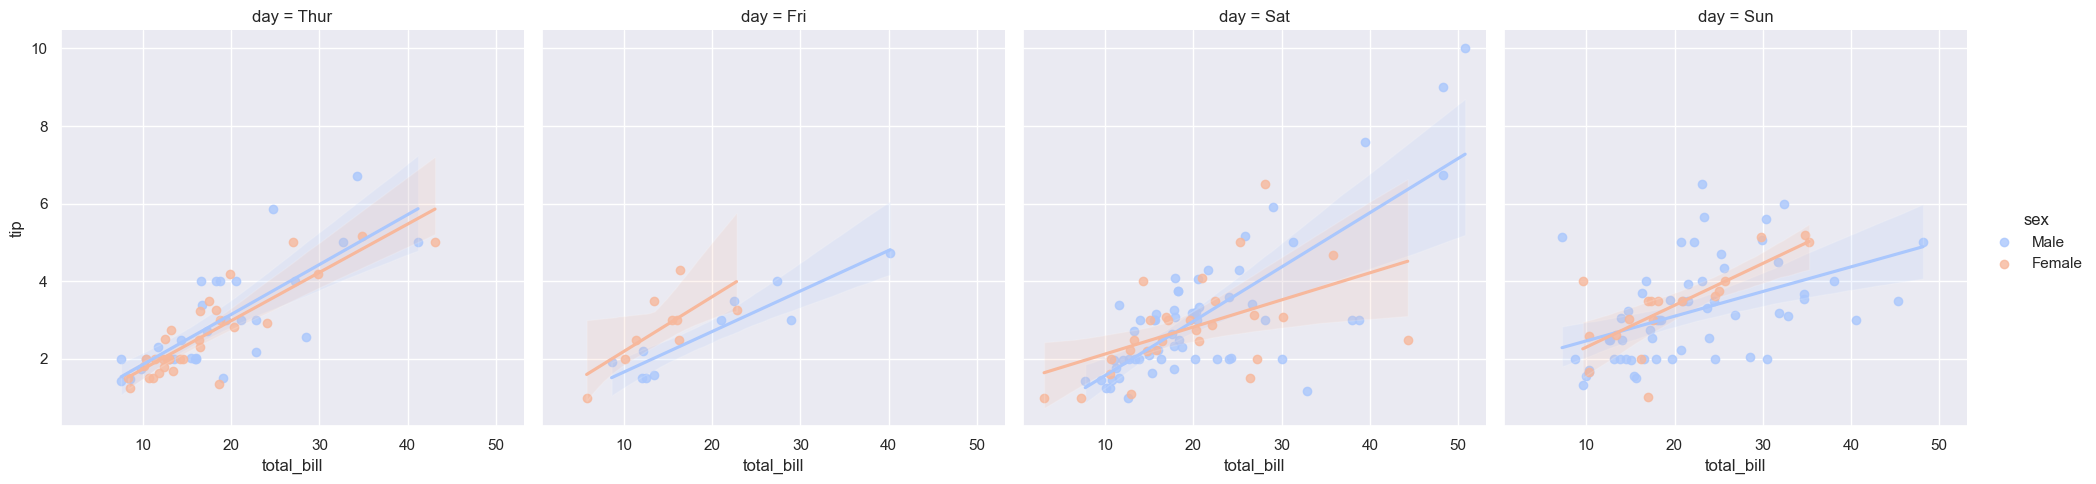

In [26]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **size** and **aspect** parameters:

/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


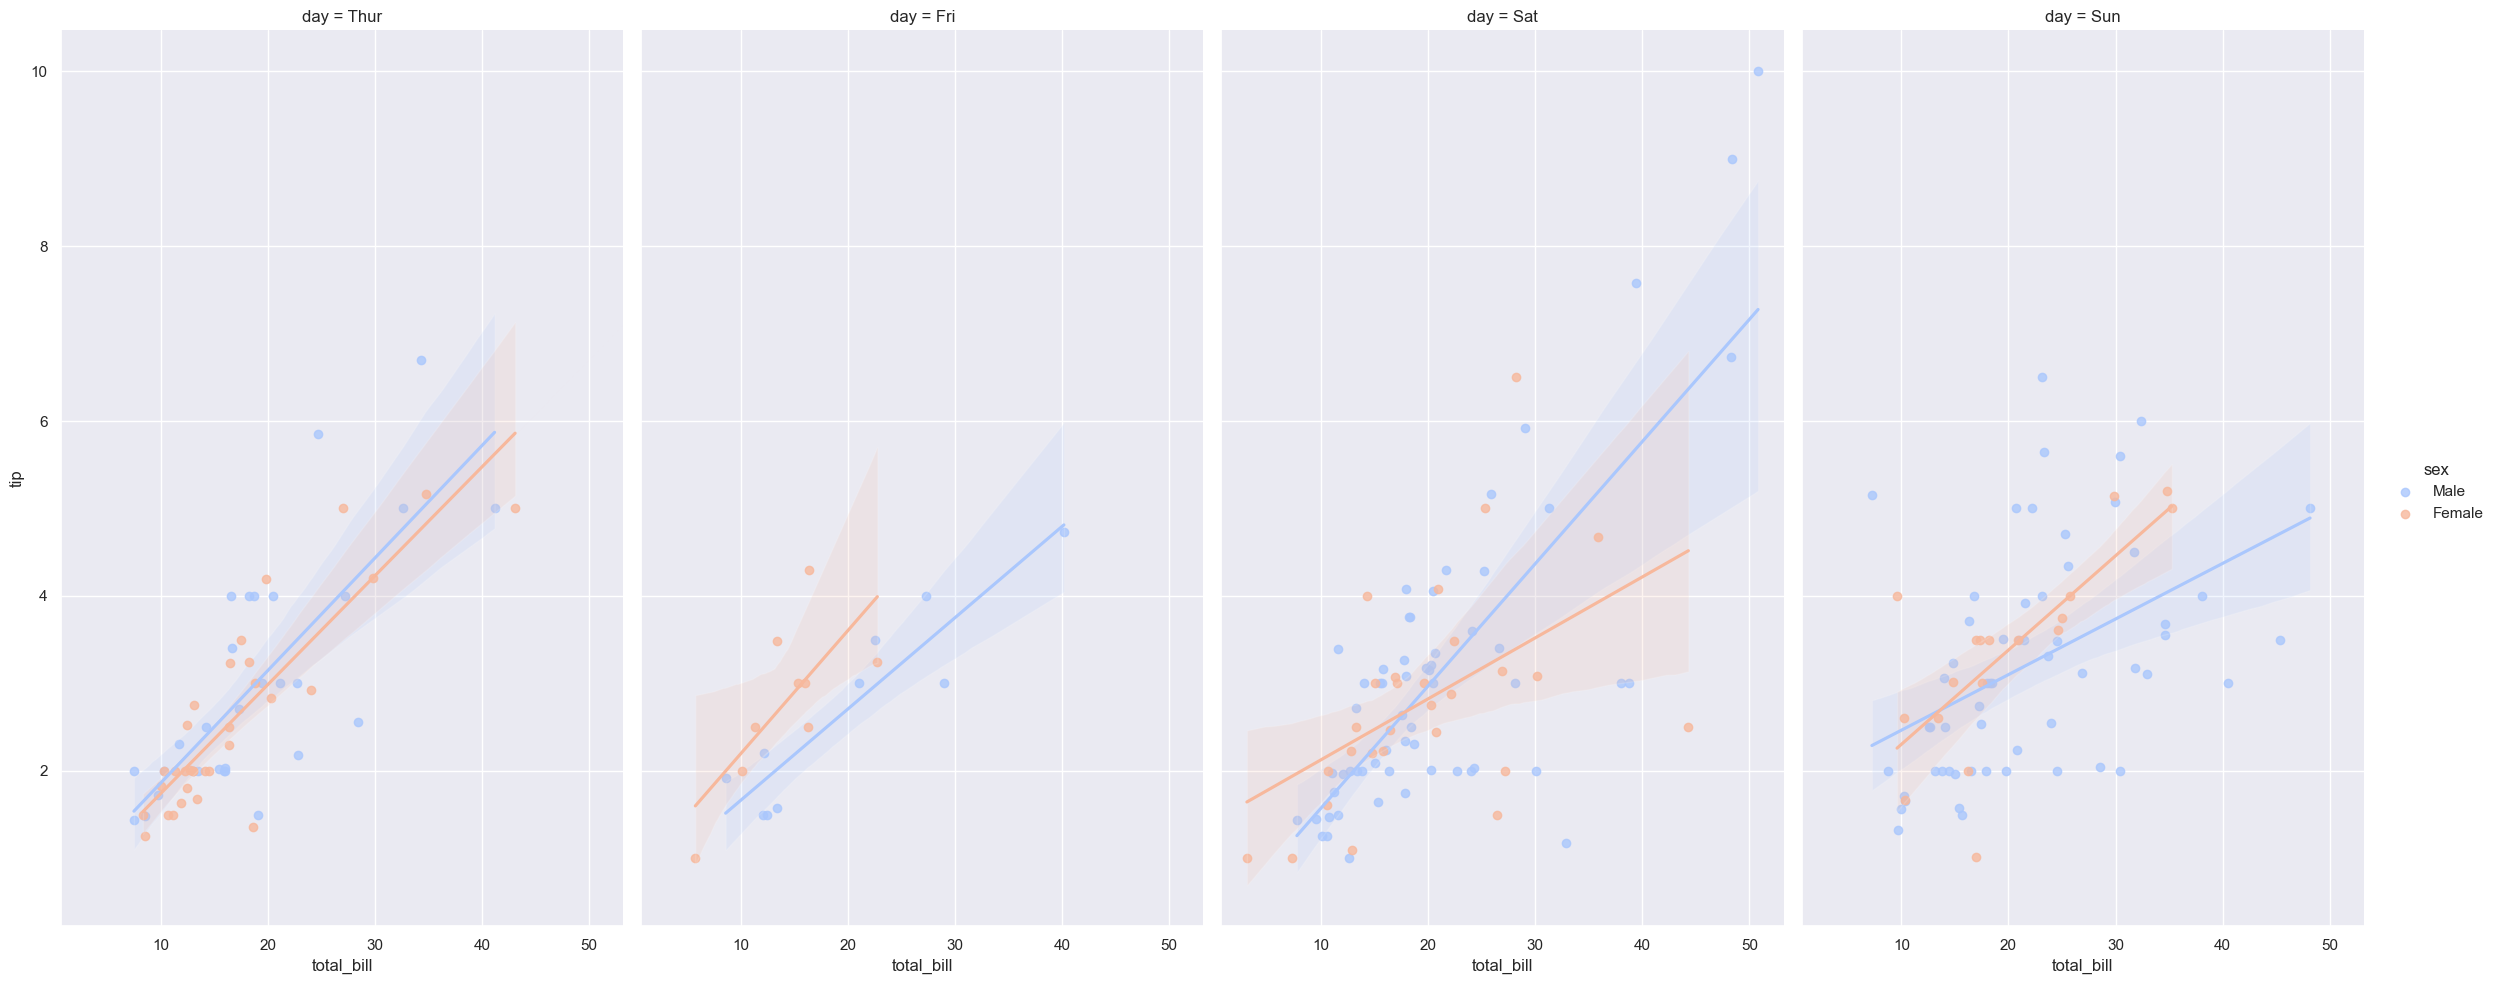

In [28]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,size=10)